In [1]:
from keras.datasets import reuters
(train_data,train_labels),(test_data, test_labels) = reuters.load_data()

Using TensorFlow backend.


In [2]:
train_data.shape

(8982,)

In [3]:
test_data.shape

(2246,)

In [4]:
max([max(sequence) for sequence in train_data])

30981

In [5]:
max([max(sequence) for sequence in test_data])

30969

In [6]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_reuters = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

557056/550378 [==============================] - 18s 33us/step


In [7]:
decoded_reuters

'? mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [6]:
import numpy as np
def vecorized_sequenses(sequenses , dimention=30982):
    result = np.zeros((len(sequenses), dimention))
    for i, sequense in enumerate(sequenses):
        result[i, sequense] = 1.
    return result

In [7]:
x_train = vecorized_sequenses(train_data)
x_test = vecorized_sequenses(test_data)

In [8]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [9]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [10]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [11]:
from keras import layers
from keras import models
from keras import optimizers
from keras import losses
from keras import activations
from keras import metrics

In [12]:
model = models.Sequential()
model.add(layers.Dense(64, activation=activations.relu, input_shape=(30982,)))
model.add(layers.Dense(64, activation=activations.relu))
model.add(layers.Dense(46, activation=activations.softmax))
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.categorical_crossentropy, metrics=[metrics.binary_accuracy])

In [13]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [14]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 5s 603us/step - loss: 2.5390 - binary_accuracy: 0.9805 - val_loss: 1.7205 - val_binary_accuracy: 0.9853
Epoch 2/20
7982/7982 [==============================] - 4s 491us/step - loss: 1.4140 - binary_accuracy: 0.9881 - val_loss: 1.3335 - val_binary_accuracy: 0.9891
Epoch 3/20
7982/7982 [==============================] - 4s 481us/step - loss: 1.0347 - binary_accuracy: 0.9912 - val_loss: 1.1583 - val_binary_accuracy: 0.9903
Epoch 4/20
7982/7982 [==============================] - 4s 510us/step - loss: 0.7942 - binary_accuracy: 0.9928 - val_loss: 1.0701 - val_binary_accuracy: 0.9909
Epoch 5/20
7982/7982 [==============================] - 4s 497us/step - loss: 0.6199 - binary_accuracy: 0.9940 - val_loss: 0.9813 - val_binary_accuracy: 0.9911
Epoch 6/20
7982/7982 [==============================] - 4s 497us/step - loss: 0.4832 - binary_accuracy: 0.9951 - val_loss: 0.9352 - val_binary_accuracy:

In [15]:
history_dic =  history.history

In [16]:
history_dic.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

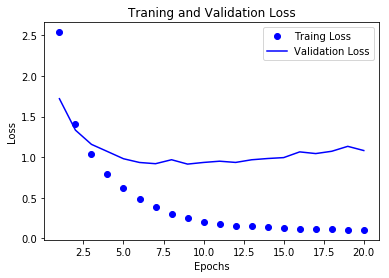

In [22]:
import matplotlib.pyplot as plt
loss_values = history_dic['loss']
val_loss_values = history_dic['val_loss']
epoch = range(1,len(history_dic['binary_accuracy'])+1)
plt.plot(epoch, loss_values, 'bo', label='Traing Loss')
plt.plot(epoch, val_loss_values, 'b', label='Validation Loss')
plt.title('Traning and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

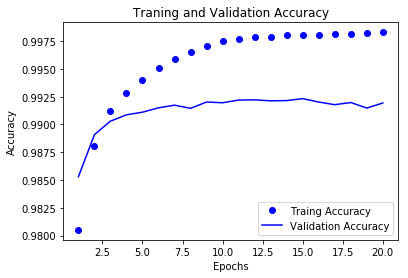

In [18]:
import matplotlib.pyplot as plt
accuracy = history_dic['binary_accuracy']
val_accuracy = history_dic['val_binary_accuracy']
epoch = range(1,len(history_dic['binary_accuracy'])+1)
plt.plot(epoch, accuracy, 'bo', label='Traing Accuracy')
plt.plot(epoch, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Traning and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [19]:
model = models.Sequential()
model.add(layers.Dense(64, activation=activations.relu, input_shape=(30982,)))
model.add(layers.Dense(64, activation=activations.relu))
model.add(layers.Dense(46, activation=activations.softmax))
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.categorical_crossentropy, metrics=[metrics.binary_accuracy])
model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 4s 555us/step - loss: 2.5421 - binary_accuracy: 0.9801 - val_loss: 1.6676 - val_binary_accuracy: 0.9850
Epoch 2/9
7982/7982 [==============================] - 4s 517us/step - loss: 1.3350 - binary_accuracy: 0.9884 - val_loss: 1.2653 - val_binary_accuracy: 0.9896
Epoch 3/9
7982/7982 [==============================] - 4s 499us/step - loss: 0.9587 - binary_accuracy: 0.9917 - val_loss: 1.1281 - val_binary_accuracy: 0.9899
Epoch 4/9
7982/7982 [==============================] - 4s 507us/step - loss: 0.7321 - binary_accuracy: 0.9933 - val_loss: 1.0341 - val_binary_accuracy: 0.9909
Epoch 5/9
7982/7982 [==============================] - 4s 494us/step - loss: 0.5651 - binary_accuracy: 0.9945 - val_loss: 0.9620 - val_binary_accuracy: 0.9913
Epoch 6/9
7982/7982 [==============================] - 4s 514us/step - loss: 0.4389 - binary_accuracy: 0.9954 - val_loss: 0.9033 - val_binary_accuracy: 0.991

In [20]:
results = model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 1s 568us/step


In [21]:
results

[1.0624181812401872, 0.9907855638837771]